In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = '/content/drive/My Drive/'

In [4]:
cars = pd.read_csv(data+"Sport_car_price.csv")
#cars = iris.drop("Id",axis=1)

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 1007 non-null   object
 1   Car Model                1007 non-null   object
 2   Year                     1007 non-null   int64 
 3   Engine Size (L)          997 non-null    object
 4   Horsepower               1007 non-null   object
 5   Torque (lb-ft)           1004 non-null   object
 6   0-60 MPH Time (seconds)  1007 non-null   object
 7   Price (in USD)           1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


In [6]:
cars

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,"3,000,000"
1003,Lotus,Evija,2021,Electric Motor,1972,1254,2,"2,000,000"
1004,McLaren,Senna,2021,4,789,590,2.7,"1,000,000"
1005,Pagani,Huayra,2021,6,764,738,3,"2,600,000"


In [7]:
cars.set_axis(["Car_Make","Car_Model","Year","Engine_size_L","Horsepower","Torque","MPH_seconds","Price_USD"], axis="columns", inplace=True)
cars.head()

,Car_Make,Car_Model,Year,Engine_size_L,Horsepower,Torque,MPH_seconds,Price_USD
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


In [8]:
print(cars.shape)

(1007, 8)


In [9]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_Make       1007 non-null   object
 1   Car_Model      1007 non-null   object
 2   Year           1007 non-null   int64 
 3   Engine_size_L  997 non-null    object
 4   Horsepower     1007 non-null   object
 5   Torque         1004 non-null   object
 6   MPH_seconds    1007 non-null   object
 7   Price_USD      1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


In [10]:
# Checking N/A values
print('Null values for each column')
cars.isnull().sum()

Null values for each column


Car_Make          0
Car_Model         0
Year              0
Engine_size_L    10
Horsepower        0
Torque            3
MPH_seconds       0
Price_USD         0
dtype: int64

In [11]:
cars["Year"] = cars["Year"].astype(str)

In [12]:
# Dropping electric cars
cars = cars[(cars['Engine_size_L'] != 'Electric')]
cars = cars[(cars['Engine_size_L'] != 'Electric Motor')]
cars = cars[(cars['Engine_size_L'] != 'Hybrid')]
cars = cars[(cars['Engine_size_L'] != 'Hybrid ')]
cars = cars[(cars['Engine_size_L'] != 'N/A')]
cars = cars[(cars['Engine_size_L'] != '1.5 + Electric')]
cars = cars[(cars["Engine_size_L"] != '-')]

cars["Engine_size_L"]=cars["Engine_size_L"].astype(float)


In [13]:
cars

,Car_Make,Car_Model,Year,Engine_size_L,Horsepower,Torque,MPH_seconds,Price_USD
0,Porsche,911,2022,3.0,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4.0,710,568,2.7,"298,000"
...,...,...,...,...,...,...,...,...
1000,Aston Martin,Vantage,2021,4.0,503,505,3.6,"146,000"
1001,Bugatti,Chiron,2021,8.0,1479,1180,2.4,"3,000,000"
1002,Koenigsegg,Jesko,2022,5.0,1280,1106,2.5,"3,000,000"
1004,McLaren,Senna,2021,4.0,789,590,2.7,"1,000,000"


In [14]:
#df['Engine'] = df['Engine'].map(lambda x  : str(x).strip().split(' ')[0])
cars["Horsepower"] = cars["Horsepower"].map(lambda x  : str(x).strip().split('+')[0]) 
cars = cars[(cars["Horsepower"] != '10,000')]
cars = cars[(cars["Horsepower"] != '1,500')]
cars["Horsepower"]=cars["Horsepower"].astype(float)

In [15]:
cars = cars[(cars["Torque"] != '-')]
cars["Torque"]=cars["Torque"].astype(float)

In [16]:
cars["MPH_seconds"]=cars["MPH_seconds"].astype(float)

In [17]:
cars['Price_USD'] = cars['Price_USD'].str.replace(',', '').astype(float)

#cars["Price_USD"]=cars["Price_USD"].astype(float)

In [18]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 956 entries, 0 to 1005
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Make       956 non-null    object 
 1   Car_Model      956 non-null    object 
 2   Year           956 non-null    object 
 3   Engine_size_L  946 non-null    float64
 4   Horsepower     956 non-null    float64
 5   Torque         955 non-null    float64
 6   MPH_seconds    956 non-null    float64
 7   Price_USD      956 non-null    float64
dtypes: float64(5), object(3)
memory usage: 67.2+ KB


In [19]:
cars.describe()

,Engine_size_L,Horsepower,Torque,MPH_seconds,Price_USD
count,946.000000,956.000000,955.000000,956.000000,9.560000e+02
mean,4.396617,618.619247,517.077487,3.575554,3.478789e+05
std,1.388017,494.107180,192.852471,0.734045,6.966034e+05
min,1.500000,181.000000,0.000000,1.800000,2.500000e+04
25%,3.500000,454.000000,398.000000,3.000000,7.097500e+04
50%,4.000000,591.000000,505.000000,3.500000,1.300000e+05
75%,5.200000,660.000000,590.000000,4.000000,2.413750e+05
max,8.400000,10000.000000,1696.000000,6.500000,5.200000e+06


In [20]:
cars

,Car_Make,Car_Model,Year,Engine_size_L,Horsepower,Torque,MPH_seconds,Price_USD
0,Porsche,911,2022,3.0,379.0,331.0,4.0,101200.0
1,Lamborghini,Huracan,2021,5.2,630.0,443.0,2.8,274390.0
2,Ferrari,488 GTB,2022,3.9,661.0,561.0,3.0,333750.0
3,Audi,R8,2022,5.2,562.0,406.0,3.2,142700.0
4,McLaren,720S,2021,4.0,710.0,568.0,2.7,298000.0
...,...,...,...,...,...,...,...,...
1000,Aston Martin,Vantage,2021,4.0,503.0,505.0,3.6,146000.0
1001,Bugatti,Chiron,2021,8.0,1479.0,1180.0,2.4,3000000.0
1002,Koenigsegg,Jesko,2022,5.0,1280.0,1106.0,2.5,3000000.0
1004,McLaren,Senna,2021,4.0,789.0,590.0,2.7,1000000.0


In [21]:
cars.isnull().sum()

Car_Make          0
Car_Model         0
Year              0
Engine_size_L    10
Horsepower        0
Torque            1
MPH_seconds       0
Price_USD         0
dtype: int64

In [22]:
cars.dropna(inplace=True)

In [23]:
cars.isnull().sum()

Car_Make         0
Car_Model        0
Year             0
Engine_size_L    0
Horsepower       0
Torque           0
MPH_seconds      0
Price_USD        0
dtype: int64

## Feature importance

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Correlation Graph')

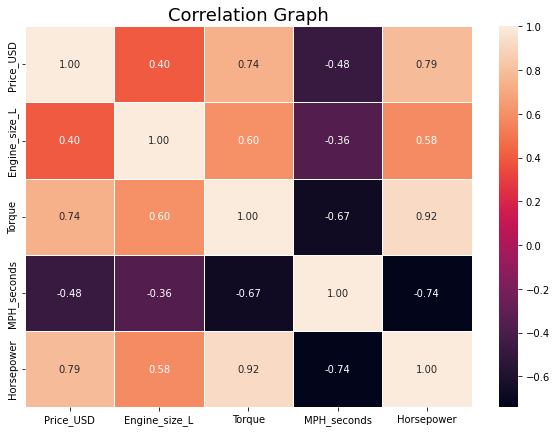

In [25]:
plt.figure(figsize=(10,7))
sns.heatmap(cars[["Price_USD","Engine_size_L","Torque","MPH_seconds","Horsepower"]].corr(), annot=True,linewidths=.5,fmt='.2f')
plt.title("Correlation Graph",size=18)

In [26]:
# Torque, Horsepower 

cars.drop(["Engine_size_L","MPH_seconds"],axis=1,inplace=True)

In [27]:
cars.head()

,Car_Make,Car_Model,Year,Horsepower,Torque,Price_USD
0,Porsche,911,2022,379.0,331.0,101200.0
1,Lamborghini,Huracan,2021,630.0,443.0,274390.0
2,Ferrari,488 GTB,2022,661.0,561.0,333750.0
3,Audi,R8,2022,562.0,406.0,142700.0
4,McLaren,720S,2021,710.0,568.0,298000.0


## Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
label = LabelEncoder()

In [30]:
label_lst = ['Car_Make', 'Car_Model']
for col in label_lst : 
  cars[col] = label.fit_transform(cars[col])

In [ ]:
cars.head()

,Car_Make,Car_Model,Year,Horsepower,Torque,Price_USD
0,27,18,7,379.0,331.0,101200.0
1,16,95,6,630.0,443.0,274390.0
2,11,5,7,661.0,561.0,333750.0
3,5,124,7,562.0,406.0,142700.0
4,21,15,6,710.0,568.0,298000.0


In [31]:
cars.isnull().sum()

Car_Make      0
Car_Model     0
Year          0
Horsepower    0
Torque        0
Price_USD     0
dtype: int64

## Training model

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

In [33]:
X = np.array(cars.drop(["Price_USD"],1))
Y = np.array(cars["Price_USD"])

<ipython-input-33-b55a2f6e42bf>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(cars.drop(["Price_USD"],1))


In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [35]:
print("N°para entrenamiento = "+str(X_train.shape[0]))
print("Testing = "+str(X_test.shape[0]))

N°para entrenamiento = 756
Testing = 190


In [39]:
lr = LogisticRegression()
svc = SVC()
dtr = DecisionTreeClassifier()
rfr = RandomForestRegressor(n_estimators=100)

In [40]:
regression_models = [lr,svc,dtr,rfr]
score_train = list()
score_test = list()

for model in regression_models : 
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    
    score_train.append(model.score(X_train,Y_train))
    score_test.append(model.score(X_test,Y_test))

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
model_names = ['Linear Regression','support vector machine','Decision Tree Regressor',"Ramdom Forest"]

scores = pd.DataFrame([model_names,score_train,score_test])
scores

,0,1,2,3
0,Linear Regression,support vector machine,Decision Tree Regressor,Ramdom Forest
1,0.268519,0.087302,0.641534,0.986041
2,0.215789,0.063158,0.4,0.907731


In [46]:
scores = scores.transpose()

In [47]:
scores.columns = [ 'Model','Training Set Accuracy','Testing set Accuracy']

In [48]:
scores

,Model,Training Set Accuracy,Testing set Accuracy
0,Linear Regression,0.268519,0.215789
1,support vector machine,0.087302,0.063158
2,Decision Tree Regressor,0.641534,0.4
3,Ramdom Forest,0.986041,0.907731


Text(0, 0.5, 'Trainig Set Accuracy')

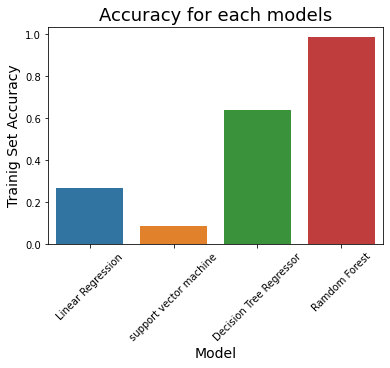

In [49]:
sns.barplot(data=scores, x='Model', y='Training Set Accuracy')
plt.title('Accuracy for each models', size=18)
plt.xticks(rotation=45,size=10)
plt.xlabel('Model',size=14)
plt.ylabel('Trainig Set Accuracy',size=14)

Text(0, 0.5, 'Testing Set Accuracy')

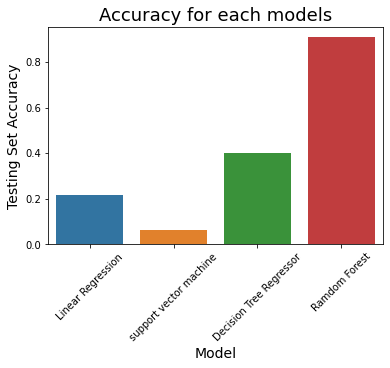

In [50]:
sns.barplot(data=scores, x='Model', y='Testing set Accuracy')
plt.title('Accuracy for each models', size=18)
plt.xticks(rotation=45,size=10)
plt.xlabel('Model',size=14)
plt.ylabel('Testing Set Accuracy',size=14)

## Random Forest

In [62]:
y_pred = rfr.predict(X_test)
print(Y_test[5],y_pred[5])

417650.0 417747.1
